# Preprocessing

## 1. Imports

### 1.1 Libraries

In [114]:
# builtin
import os, time, sys, random

# data
import pandas as pd
import numpy as np
import requests
import math

# viz
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# NLP
import string
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.corpus import RegexpTokenizer
from nltk.stem.snowball import FrenchStemmer
from collections import Counter
import spacy

# ML
from gensim.models import Word2Vec
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# other
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from pandarallel import pandarallel

### 1.2 Download and options

In [5]:
nltk.download('stopwords')
nltk.download('wordpunct')
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melvin.derouk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading wordpunct: Package 'wordpunct' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melvin.derouk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\melvin.derouk\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melvin.derouk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nlp = spacy.load("fr_core_news_sm")

In [7]:
sns.set()

In [8]:
pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


### 1.3 Loading data

In [9]:
# CSV

#Env Perso
#df = pd.read_csv(r"C:\Users\derou\OneDrive\Bureau\DATA\PORTFOLIO\Recommandation de films\df_movies_cleaned.csv")

# Env Vinci
df = pd.read_csv(r"C:\Users\melvin.derouk\Desktop\Data formation\Movies-Recommandations\df_movies_cleaned.csv")

# "Synopsis"

## 2. Work on a specific document

In [10]:
# Fonction de saut de ligne pour output
def insert_newlines(string, every=80):
    lines = []
    for i in range(0, len(string), every):
        lines.append(string[i:i+every])
    return '\n'.join(lines)

In [11]:
doc = df.Synopsis.sample(1)
doc = doc.values[0]
print(insert_newlines(doc, every=200))

Nouvelle recrue d’une équipe d’élite officiant pour le contre-espionnage américain, Mitch Rapp va suivre un rude entraînement mené par Stan Hurley, formateur légendaire de la CIA. Face à une vague d’a
ttaques terroristes sans précédent à travers le monde, les deux hommes vont devoir s’attaquer à Ghost, un individu aussi dangereux qu’insaisissable, ayant pour intention de déclencher une guerre nuclé
aire.


### 2.1 Lower

In [12]:
doc = doc.lower()

In [13]:
print(insert_newlines(doc, every=200))

nouvelle recrue d’une équipe d’élite officiant pour le contre-espionnage américain, mitch rapp va suivre un rude entraînement mené par stan hurley, formateur légendaire de la cia. face à une vague d’a
ttaques terroristes sans précédent à travers le monde, les deux hommes vont devoir s’attaquer à ghost, un individu aussi dangereux qu’insaisissable, ayant pour intention de déclencher une guerre nuclé
aire.


### 2.2 Tokenization

In [14]:
tokens = word_tokenize(doc)
tokens

['nouvelle',
 'recrue',
 'd',
 '’',
 'une',
 'équipe',
 'd',
 '’',
 'élite',
 'officiant',
 'pour',
 'le',
 'contre-espionnage',
 'américain',
 ',',
 'mitch',
 'rapp',
 'va',
 'suivre',
 'un',
 'rude',
 'entraînement',
 'mené',
 'par',
 'stan',
 'hurley',
 ',',
 'formateur',
 'légendaire',
 'de',
 'la',
 'cia',
 '.',
 'face',
 'à',
 'une',
 'vague',
 'd',
 '’',
 'attaques',
 'terroristes',
 'sans',
 'précédent',
 'à',
 'travers',
 'le',
 'monde',
 ',',
 'les',
 'deux',
 'hommes',
 'vont',
 'devoir',
 's',
 '’',
 'attaquer',
 'à',
 'ghost',
 ',',
 'un',
 'individu',
 'aussi',
 'dangereux',
 'qu',
 '’',
 'insaisissable',
 ',',
 'ayant',
 'pour',
 'intention',
 'de',
 'déclencher',
 'une',
 'guerre',
 'nucléaire',
 '.']

In [15]:
# longueur de la liste
len(tokens)

76

In [16]:
# longueur de la liste (sans les doublons)
len(set(tokens))

57

In [17]:
def display_tokens_infos(tokens):
    """display info about corpus"""

    print(f"nb tokens {len(tokens)}, nb tokens uniques {len(set(tokens))}")
    print(tokens[:30])

In [18]:
tokens = wordpunct_tokenize(doc)
display_tokens_infos(tokens)

nb tokens 78, nb tokens uniques 59
['nouvelle', 'recrue', 'd', '’', 'une', 'équipe', 'd', '’', 'élite', 'officiant', 'pour', 'le', 'contre', '-', 'espionnage', 'américain', ',', 'mitch', 'rapp', 'va', 'suivre', 'un', 'rude', 'entraînement', 'mené', 'par', 'stan', 'hurley', ',', 'formateur']


### 2.3 Stopwords

In [19]:
stop_words = set(stopwords.words('french'))

In [20]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_infos(tokens)

nb tokens 55, nb tokens uniques 46
['nouvelle', 'recrue', '’', 'équipe', '’', 'élite', 'officiant', 'contre', '-', 'espionnage', 'américain', ',', 'mitch', 'rapp', 'va', 'suivre', 'rude', 'entraînement', 'mené', 'stan', 'hurley', ',', 'formateur', 'légendaire', 'cia', '.', 'face', 'vague', '’', 'attaques']


In [21]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(doc)
display_tokens_infos(tokens)

nb tokens 65, nb tokens uniques 55
['nouvelle', 'recrue', 'd', 'une', 'équipe', 'd', 'élite', 'officiant', 'pour', 'le', 'contre', 'espionnage', 'américain', 'mitch', 'rapp', 'va', 'suivre', 'un', 'rude', 'entraînement', 'mené', 'par', 'stan', 'hurley', 'formateur', 'légendaire', 'de', 'la', 'cia', 'face']


In [22]:
tokens = [w for w in tokens if w not in stop_words]
display_tokens_infos(tokens)

nb tokens 42, nb tokens uniques 42
['nouvelle', 'recrue', 'équipe', 'élite', 'officiant', 'contre', 'espionnage', 'américain', 'mitch', 'rapp', 'va', 'suivre', 'rude', 'entraînement', 'mené', 'stan', 'hurley', 'formateur', 'légendaire', 'cia', 'face', 'vague', 'attaques', 'terroristes', 'sans', 'précédent', 'travers', 'monde', 'deux', 'hommes']


### 2.4 First cleaning function

In [23]:
def process_synopsis_1(doc, rejoin=False):

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    if rejoin : 
        return " ".join(cleaned_tokens_list)
    
    return cleaned_tokens_list

In [24]:
tokens = process_synopsis_1(doc)
display_tokens_infos(tokens)

nb tokens 42, nb tokens uniques 42
['nouvelle', 'recrue', 'équipe', 'élite', 'officiant', 'contre', 'espionnage', 'américain', 'mitch', 'rapp', 'va', 'suivre', 'rude', 'entraînement', 'mené', 'stan', 'hurley', 'formateur', 'légendaire', 'cia', 'face', 'vague', 'attaques', 'terroristes', 'sans', 'précédent', 'travers', 'monde', 'deux', 'hommes']


## 3. Work on the entire corpus

### 3.1 Build raw corpus

In [25]:
raw_corpus = "".join(df.Synopsis.values)
raw_corpus[:3_00]

'Un groupe d\'animaux animatroniques interprète des chansons pour enfants le jour et fait des razzias meurtrières la nuit. Adaptation du jeu vidéo "Five Nights at Freddy\'s", au croisement du Survival Horror - action - stratégie.Dans l\'espoir d\'une guérison miraculeuse, John Kramer se rend au Mexique p'

In [26]:
len(raw_corpus)

3691703

In [27]:
corpus = process_synopsis_1(raw_corpus)
display_tokens_infos(corpus)

nb tokens 365558, nb tokens uniques 37098
['groupe', 'animaux', 'animatroniques', 'interprète', 'chansons', 'enfants', 'jour', 'fait', 'razzias', 'meurtrières', 'nuit', 'adaptation', 'jeu', 'vidéo', 'five', 'nights', 'at', 'freddy', 'croisement', 'survival', 'horror', 'action', 'stratégie', 'espoir', 'guérison', 'miraculeuse', 'john', 'kramer', 'rend', 'mexique']


In [28]:
tmp = pd.Series(corpus).value_counts()
tmp

a             3663
plus          3111
jeune         2002
vie           1878
alors         1744
              ... 
donbass          1
springwood       1
veines           1
mykola           1
tweedledum       1
Length: 37098, dtype: int64

In [29]:
tmp.head(20)

a          3663
plus       3111
jeune      2002
vie        1878
alors      1744
deux       1644
tout       1608
va         1519
après      1338
faire      1286
monde      1246
ans        1212
femme      1184
fait       1182
cette      1179
où         1169
leurs      1157
être       1079
famille    1013
homme       966
dtype: int64

In [30]:
tmp.tail(10)

caractérisée     1
arborescence     1
trempant         1
intermittence    1
doublé           1
donbass          1
springwood       1
veines           1
mykola           1
tweedledum       1
dtype: int64

In [31]:
tmp.describe()

count    37098.000000
mean         9.853847
std         52.490944
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       3663.000000
dtype: float64

### 3.2 List rare tokens

In [32]:
# unique words = usefull ?

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp==1]
list_unique_words[:20]

cochise           1
rookery           1
videuse           1
claremont         1
1593              1
madelyn           1
appellera         1
auditoires        1
remportent        1
morningside       1
dévoilé           1
mécène            1
elsinore          1
croyance          1
significations    1
flingue           1
régional          1
1845              1
bouman            1
meurtries         1
dtype: int64

In [33]:
len(list_unique_words)

16119

In [34]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:20]

['cochise',
 'rookery',
 'videuse',
 'claremont',
 '1593',
 'madelyn',
 'appellera',
 'auditoires',
 'remportent',
 'morningside',
 'dévoilé',
 'mécène',
 'elsinore',
 'croyance',
 'significations',
 'flingue',
 'régional',
 '1845',
 'bouman',
 'meurtries']

In [35]:
tmp = pd.DataFrame({"words" : list_unique_words})
tmp.to_csv("unique_words.csv", index=False)

In [36]:
# idem for min 5 times

tmp = pd.Series(corpus).value_counts()
list_min_5_words = tmp[tmp==5]
list_min_5_words[:20]

travaillait      5
barnes           5
mountain         5
balade           5
combatif         5
omnitrix         5
neal             5
terrorisé        5
rafe             5
agatha           5
1935             5
héroïnes         5
krank            5
creusent         5
psychose         5
irréductibles    5
nolan            5
cotton           5
souci            5
mordre           5
dtype: int64

In [37]:
len(list_min_5_words)

1408

In [38]:
list_min_5_words = list(list_min_5_words.index)
list_min_5_words[:20]

['travaillait',
 'barnes',
 'mountain',
 'balade',
 'combatif',
 'omnitrix',
 'neal',
 'terrorisé',
 'rafe',
 'agatha',
 '1935',
 'héroïnes',
 'krank',
 'creusent',
 'psychose',
 'irréductibles',
 'nolan',
 'cotton',
 'souci',
 'mordre']

In [39]:
tmp = pd.DataFrame({"words" : list_min_5_words})
tmp.to_csv("min_5_words.csv", index=False)

In [40]:
# idem for min 10 times ???????????????????

tmp = pd.Series(corpus).value_counts()
list_min_10_words = tmp[tmp==10]
list_min_10_words[:20]

affamés          10
perturbée        10
gueule           10
civils           10
redouté          10
ministère        10
rongé            10
marchands        10
drake            10
arrêtent         10
ana              10
lionel           10
remplie          10
psychologique    10
cochon           10
déroulent        10
mac              10
chienne          10
effrayantes      10
survivante       10
dtype: int64

In [41]:
len(list_min_10_words)

415

### 3.3 Second cleaning function

In [42]:
def process_synopsis_2(doc,
                       rejoin=False,
                       list_rare_words=None,
                       min_len_word=3,
                       force_is_alpha=True) : 
    
    """cf process_synopsis_1 but with list_unique_words, min_len_word, and force_is_alpha

    positionnal arguments :
    ------------------------
    doc : str : the document (aka a text in str format) to process

    opt args : 
    ------------------------
    rejoin : bool : if True return a string else return the list of tokens
    list_rare_words : list : a list of rare words to exclude
    min_len_word : int : minimum lenght of a word to not exclude
    force_is_alpha : if 1, exclude all tokens with a numeric character

    return : 
    ------------------------
    a string (if rejoin is True) or a list of tokens
    """
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    #############################################################
    #############################################################

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha : 
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else : 
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(alpha_tokens)
    
    return alpha_tokens

In [43]:
display_tokens_infos(corpus)

nb tokens 365558, nb tokens uniques 37098
['groupe', 'animaux', 'animatroniques', 'interprète', 'chansons', 'enfants', 'jour', 'fait', 'razzias', 'meurtrières', 'nuit', 'adaptation', 'jeu', 'vidéo', 'five', 'nights', 'at', 'freddy', 'croisement', 'survival', 'horror', 'action', 'stratégie', 'espoir', 'guérison', 'miraculeuse', 'john', 'kramer', 'rend', 'mexique']


In [44]:
len(set(corpus))

37098

In [45]:
#3-5 min process

corpus = process_synopsis_2(raw_corpus,
                            list_rare_words=list_unique_words,
                            rejoin=False)
display_tokens_infos(corpus)

nb tokens 337118, nb tokens uniques 20558
['groupe', 'animaux', 'animatroniques', 'interprète', 'chansons', 'enfants', 'jour', 'fait', 'meurtrières', 'nuit', 'adaptation', 'jeu', 'vidéo', 'five', 'freddy', 'croisement', 'action', 'stratégie', 'espoir', 'guérison', 'miraculeuse', 'john', 'kramer', 'rend', 'mexique', 'procédure', 'médicale', 'risquée', 'expérimentale', 'découvrir']


In [46]:
len(set(corpus))

20558

### 3.4 Stemming & Lemmatize

In [47]:
#test fonction stemming

def process_synopsis_3(doc,
                       rejoin=False,
                       lemm_or_stemm="stem",
                       list_rare_words=None,
                       min_len_word=3,
                       force_is_alpha=True) : 
    
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha : 
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else : 
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = WordNetLemmatizer()
        trans_text = [trans.lemmatize(i) for i in alpha_tokens]
    else : 
        trans = FrenchStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

#test fonction lemmatize

def process_synopsis_3(doc,
                       rejoin=False,
                       lemm_or_stemm="lem",
                       list_rare_words=None,
                       min_len_word=3,
                       force_is_alpha=True) : 
    
    
    # list unique words
    if not list_rare_words:
        list_rare_words = []

    # lower
    doc = doc.lower().strip()

    # tokenize
    tokenizer = RegexpTokenizer(r'\w+')
    raw_tokens_list = tokenizer.tokenize(doc)

    # stop words
    cleaned_tokens_list = [w for w in raw_tokens_list if w not in stop_words]

    # no rare tokens
    non_rare_tokens = [w for w in cleaned_tokens_list if w not in list_rare_words]

    # no more len words
    more_than_N = [w for w in non_rare_tokens if len(w) >= min_len_word]

    # only alpha chars
    if force_is_alpha : 
        alpha_tokens = [w for w in more_than_N if w.isalpha()]
    else : 
        alpha_tokens = more_than_N

    #############################################################
    #############################################################

    # stem or lem
    if lemm_or_stemm == "lem" : 
        trans = nlp(' '.join(alpha_tokens))
        trans_text = [trans.lemma_(i) for i in alpha_tokens]
    else : 
        trans = FrenchStemmer()
        trans_text = [trans.stem(i) for i in alpha_tokens]
    #############################################################
    #############################################################

    # manage return type
    if rejoin : 
        return " ".join(trans_text)
    
    return trans_text

In [48]:
corpus = process_synopsis_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(20)

306377        vit
62251        perd
20219     jackson
336551       deux
288642    provoqu
62148      commun
297150       égal
79580         fin
199635       fair
13574     liaison
184777       méti
135832      encor
174130      rapid
72244        ninj
102604      ombre
129782       afin
329490     craint
306223       fair
127070      enlev
217931     nouvel
dtype: object

In [49]:
len(set(corpus))

12874

### 3.5 Wordcloud

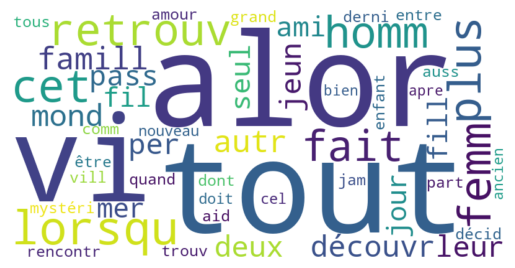

In [50]:
wordcloud = WordCloud(width = 800,
                      height = 400,
                      background_color='white',
                      stopwords=[],
                      max_words=50).generate(" ".join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. Final clean

In [51]:
def final_clean(doc) :

    new_doc = process_synopsis_3(doc,
                                 rejoin=False,
                                 lemm_or_stemm="stem",
                                 list_rare_words=list_unique_words,
                                 min_len_word=3,
                                 force_is_alpha=True)
    return new_doc

In [52]:
df['clean_synopsis'] = df.Synopsis.apply(final_clean)

In [53]:
df.head(5)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt,clean_synopsis
0,507089,Five Nights at Freddy's,"['Horreur', 'Mystère']",2023-10-25,Un groupe d'animaux animatroniques interprète ...,8.4,226,"[group, animal, animatron, interpret, chanson,..."
1,951491,Saw X,"['Horreur', 'Thriller']",2023-09-26,"Dans l'espoir d'une guérison miraculeuse, John...",7.4,373,"[espoir, guérison, miracul, john, kram, rend, ..."
2,939335,Muzzle,"['Action', 'Crime', 'Drame', 'Thriller']",2023-09-29,"Jake Rosser, officier de police dans l'équipe ...",6.3,272,"[jak, offici, polic, équip, los, angel, voit, ..."
3,354912,Coco,"['Familial', 'Animation', 'Fantastique', 'Musi...",2017-10-27,"Depuis déjà plusieurs générations, la musique ...",8.2,627,"[depuis, déjà, plusieur, géner, musiqu, famill..."
4,968051,La Nonne : La Malédiction de Sainte-Lucie,"['Horreur', 'Mystère', 'Thriller']",2023-09-06,"En France, en 1956, un prêtre est assassiné da...",7.0,343,"[franc, prêtr, assassin, internat, apres, mort..."


In [54]:
df.sort_values("len_txt").head(10)

,ID,Titre,Genre,Date de sortie,Synopsis,Note,len_txt,clean_synopsis
3945,36362,Le Roi des rois,"['Drame', 'Fantastique']",1961-10-11,Péplum retraçant la vie de Jésus.,7.1,33,"[retrac, vi, jésus]"
6306,347183,Haikyu !! - Film 1 - Un début et une fin,"['Animation', 'Comédie', 'Drame']",2015-07-03,Premier Haikyuu !! film récapitulatif. Ld,8.5,41,"[premi, film]"
7591,44363,Frozen,['Thriller'],2010-02-05,Trois skieurs sont bloqués sur un télésiège...,6.0,46,"[trois, bloqu]"
4992,876716,Ciao Alberto,"['Animation', 'Comédie', 'Familial', 'Fantasti...",2021-11-12,"Spin-off de Luca, des studios d’animation Pixar.",7.5,48,"[spin, off, luc, studios, anim, pixar]"
5395,336445,Army of One,['Comédie'],2016-11-04,Un homme décide de traquer seul Oussama Ben La...,5.2,50,"[homm, décid, traqu, seul, oussam, ben, laden]"
5060,52212,Miranda,"['Comédie', 'Romance']",1985-10-15,Miranda cherche un mari et essaye plusieurs ho...,5.2,51,"[mirand, cherch, mar, essay, plusieur, homm]"
6039,706972,Narco Sub,['Action'],2021-01-22,Un homme deviendra un criminel pour sauver sa ...,6.6,54,"[homm, deviendr, criminel, sauv, famill]"
6476,286554,Aventure d'un soir,"['Romance', 'Comédie']",2014-09-26,Un couple se retrouve pris au piège lors d'une...,6.4,55,"[coupl, retrouv, pris, pieg, lor, tempêt]"
6066,184341,Hands of Stone,['Drame'],2016-08-26,Retour sur la carrière du boxeur panaméen Robe...,6.5,56,"[retour, carri, boxeur, panaméen, roberto]"
2632,12110,"Dracula, mort et heureux de l’être","['Comédie', 'Horreur']",1995-12-22,"Le ""Dracula"" de Bram Stoker revu et corrigé pa...",6.0,59,"[dracul, bram, stok, revu, mel, brook]"


In [55]:
df.to_csv("df_movies_txt_cleaned.csv", index=False)

=============================================================

In [71]:
# on reconverti la colonne clean_synopsis_str en chaine de char
df['clean_synopsis_str'] = df['clean_synopsis'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# "Date de sortie"

In [58]:
df['Date de sortie'] = pd.to_datetime(df['Date de sortie'])

In [59]:
current_year = datetime.now().year
df['Age du film'] = current_year - df['Date de sortie'].dt.year

# "Titre"

In [84]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Titre'])

# "Genre"

In [96]:
# Vectorisation binaires des genres
print(len(df))
print(df['Genre'].apply(lambda x: isinstance(x, str)).sum())

8893
0


In [97]:
df['Genre'] = df['Genre'].apply(lambda x: eval(x) if isinstance(x, str) else x)
print(df['Genre'].apply(lambda x: isinstance(x, list)).sum())

8893


In [98]:
mlb = MultiLabelBinarizer()
genre_binarized = mlb.fit_transform(df['Genre'])

# Créer un DataFrame avec les résultats
genre_df = pd.DataFrame(genre_binarized, columns=mlb.classes_)

In [99]:
genre_df.index = df.index

In [108]:
df = pd.concat([df.drop('Genre', axis=1), genre_df], axis=1)

KeyError: "['Genre'] not found in axis"

### Features

In [109]:
features = df[['Titre', 'Age du film', 'clean_synopsis_str', 'Note'] + list(genre_df)]

In [102]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Titre', TfidfVectorizer(), ['Titre']),
        ('clean_synopsis', TfidfVectorizer(), 'clean_synopsis_str'),
        ('Note', MinMaxScaler(), ['Note'])
    ],
    remainder='passthrough' 
)

In [113]:
features

,Titre,Age du film,clean_synopsis_str,Note,Action,Animation,Aventure,Comédie,Crime,Documentaire,...,Guerre,Histoire,Horreur,Musique,Mystère,Romance,Science-Fiction,Thriller,Téléfilm,Western
0,Five Nights at Freddy's,0,group animal animatron interpret chanson enfan...,8.4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,Saw X,0,espoir guérison miracul john kram rend mexiqu ...,7.4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,Muzzle,0,jak offici polic équip los angel voit partenai...,6.3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Coco,6,depuis déjà plusieur géner musiqu famill migue...,8.2,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,La Nonne : La Malédiction de Sainte-Lucie,0,franc prêtr assassin internat apres mort prêtr...,7.0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8888,Jusqu'à ce que la fin du monde nous sépare,11,fer fin mond semain question tout human oblig ...,6.6,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8889,82년생 김지영,4,kim young épous aim mer attention soucieux res...,7.4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8890,Tod@s Caen,4,adam mi deux veulent enseign leur amis respect...,7.8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8891,Pressure,8,quatr plongeur envoi fond océan bord cabin rép...,5.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [120]:
titre_tfidf = TfidfVectorizer().fit_transform(df['Titre'])

# Appliquez le TfidfVectorizer sur la colonne 'clean_synopsis_str'
synopsis_tfidf = TfidfVectorizer().fit_transform(df['clean_synopsis_str'])

# Normalisez la colonne 'Note'
note_scaled = MinMaxScaler().fit_transform(df[['Note']])  # Notez les doubles crochets

# Assurez-vous que les colonnes de genre binarisées sont correctes
# Ici, je suppose que les colonnes de genre binarisées sont nommées comme 'Horreur', 'Mystère', etc.
genre_columns = ['Horreur', 'Musique', 'Mystère', 'Romance', 'Science-Fiction', 'Thriller', 'Téléfilm', 'Western']
genre_matrix = df[genre_columns].values

In [121]:
features_vectorized = hstack([titre_tfidf, synopsis_tfidf, note_scaled, genre_matrix])

In [123]:
cosine_sim = cosine_similarity(features_vectorized)

In [137]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df.index[df['Titre'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Obtenez les 10 films les plus similaires
    movie_indices = [i[0] for i in sim_scores]
    return df['Titre'].iloc[movie_indices]

# Obtenir des recommandations pour un film spécifique
recommendations = get_recommendations('Bienvenue à Zombieland', cosine_sim)
print(recommendations)

1059                       Retour à Zombieland
4999                               Dead Snow 2
1482                                MexZombies
997     Manuel de survie à l'apocalypse zombie
5735                       L'Enfer des Zombies
389              Zom 100 : La liste de la mort
7763                       Cockneys vs Zombies
4719                                 Braindead
5010                         Zombie Fight Club
7782                Wyrmwood: Road of the Dead
Name: Titre, dtype: object
